In [1]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones para mostrar gráficas correctamente
%matplotlib inline
sns.set(style="whitegrid", palette="muted")

In [2]:
# cargar archivo para dataset
df = pd.read_csv("C:/Users/mariu/Downloads/Credit_Risk_Insights_Bank/data/CreditScoreClassificationDataset.csv", sep=';')
# Ver primeras filas
df.head()


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,Loan Approved,Defaulted,Customer Tenure,Product Type,Risk Level
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High,No,No,1,Personal Loan,Low
1,30,Male,100000,Master's Degree,Married,2,Owned,High,Yes,No,2,Mortgage,Low
2,35,Female,75000,Doctorate,Married,1,Owned,High,Yes,No,6,Credit Card,Low
3,40,Male,125000,High School Diploma,Single,0,Owned,High,No,No,7,Car Loan,Low
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High,No,No,2,Car Loan,Medium


In [3]:
# Dimensiones del dataset
print("Filas y columnas:", df.shape)

# Nombres y tipos de columnas
df.info()

# Ver si hay valores nulos
df.isnull().sum()


Filas y columnas: (242, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 242 non-null    int64 
 1   Gender              242 non-null    object
 2   Income              242 non-null    int64 
 3   Education           242 non-null    object
 4   Marital Status      242 non-null    object
 5   Number of Children  242 non-null    int64 
 6   Home Ownership      242 non-null    object
 7   Credit Score        242 non-null    object
 8   Loan Approved       242 non-null    object
 9   Defaulted           242 non-null    object
 10  Customer Tenure     242 non-null    int64 
 11  Product Type        242 non-null    object
 12  Risk Level          242 non-null    object
dtypes: int64(4), object(9)
memory usage: 24.7+ KB


Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
Loan Approved         0
Defaulted             0
Customer Tenure       0
Product Type          0
Risk Level            0
dtype: int64

In [4]:
# Estadísticas de variables numéricas
df.describe()

,Age,Income,Number of Children,Customer Tenure
count,242.000000,242.000000,242.000000,242.000000
mean,39.128099,84295.454545,1.020661,3.681818
std,8.322102,34968.778309,1.171757,2.639078
min,25.000000,20300.000000,0.000000,0.000000
25%,32.000000,57500.000000,0.000000,1.000000
50%,39.000000,85000.000000,1.000000,3.000000
75%,46.000000,106800.000000,2.000000,6.000000
max,54.000000,162500.000000,4.000000,10.000000


In [5]:
# Distribución de variables categóricas
df.select_dtypes(include='object').nunique()


Gender            2
Education         5
Marital Status    2
Home Ownership    2
Credit Score      3
Loan Approved     2
Defaulted         2
Product Type      4
Risk Level        3
dtype: int64

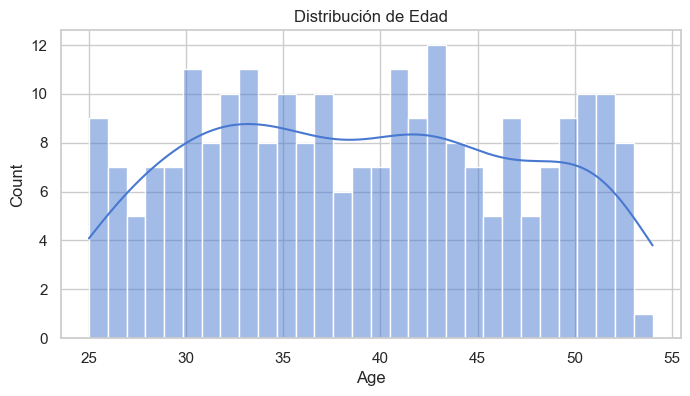

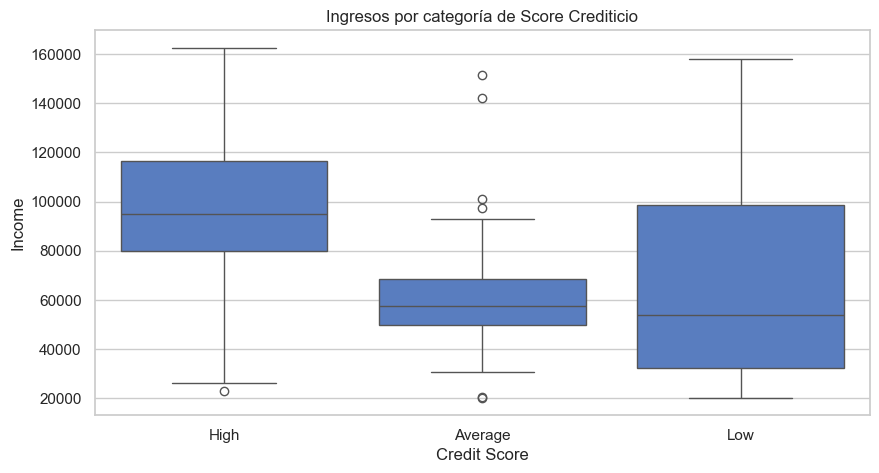

In [6]:
# Histograma de edades
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Distribución de Edad")
plt.show()

# Comparar ingresos por score de crédito (si está disponible)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Credit Score', y='Income')
plt.title("Ingresos por categoría de Score Crediticio")
plt.show()


## Análisis de la Distribución de Edad
1.  **Eje X (`Age` - Edad):** Representa los rangos de edad. El gráfico parece abarcar edades desde aproximadamente 25 hasta 55 años.
2.  **Eje Y (`Count` - Conteo):** Muestra la frecuencia o el número de individuos que caen dentro de cada rango de edad.
3.  **Forma de la Distribución:**
    * Se observan máximos locales en edades cercanas a 30, 35, 40 y 50 años. Estos valores representan grupos con mayor concentración de individuos, sugiriendo posibles rangos etarios con mayor presencia en la población analizada.
    * En contraste, las edades extremas (25 y 55 años) tienen una menor frecuencia, lo que indica que hay menos individuos en estos segmentos.
    * La curva de densidad indica que la distribución no es simétrica.
    * 

4.  **Distribución Bimodal o Multimodal Sugerida:** - Parece haber uno o varios valores modales, lo que sugiere que la distribución es multimodal en lugar de unimodal. Esto significa que existen diferentes grupos etarios predominantes en la población analizada, en vez de una única edad dominante.

### Conclusión Breve:

Es probable que los ingresos aumenten con la edad hasta cierto punto, reflejando el crecimiento profesional y la acumulación de experiencia laboral. Los clientes más jóvenes tienden a tener ingresos más bajos, mientras que aquellos en sus 40 y 50 años pueden alcanzar mayores niveles salariales.
Si observamos agrupaciones en ciertos rangos de edad, podríamos identificar perfiles financieros dominantes, como jóvenes con ingresos modestos y adultos con ingresos más elevados.
Un banco puede usar esta información para ajustar criterios de otorgamiento de crédito, favoreciendo clientes con ingresos más altos o estableciendo estrategias de financiamiento para aquellos con ingresos menores.



### Análisis de las Categorías de Score Crediticio:

1.  **Ingresos por categoría de Score Crediticio:**
    * Los clientes con menor score tienen una mediana de ingresos más baja, reflejando posiblemente una menor estabilidad financiera.
    * A medida que el score aumenta, se observa una tendencia al alza en los ingresos medianos, lo que sugiere que los clientes con mejor historial crediticio tienen mayores ingresos.


2.  **Variabilidad en los ingresos dentro de cada categoría:**
    * Para las categorías de menor score, las cajas del boxplot son más compactas, lo que indica que la mayoría de los clientes tienen ingresos similares, sin mucha dispersión.
    * En los scores más altos, la variabilidad es mayor, con cajas más grandes y bigotes más extendidos, lo que sugiere una mayor diversidad de ingresos dentro de este grupo.


3.  **- Valores atípicos:**
    * Se observan puntos atípicos en ingresos altos dentro de categorías de score bajo, lo que indica que algunos clientes con puntuación de crédito menor pueden tener ingresos elevados, pero posiblemente otros factores afectan su score.
    * También hay valores atípicos en scores altos con ingresos bajos, lo que podría indicar que algunos clientes tienen buen historial crediticio a pesar de no contar con altos ingresos.


### Conclusiones:

* Existe una **clara y fuerte correlación positiva** entre el puntaje crediticio y el nivel de ingresos. A medida que el puntaje crediticio mejora (de 'Low' a 'Average' a 'High'), el ingreso mediano de los individuos también aumenta significativamente.
* Las distribuciones de ingresos para cada categoría de puntaje crediticio son bastante distintas, con una superposición mínima entre sus rangos intercuartílicos. Esto sugiere que el ingreso es un factor diferenciador significativo entre estos grupos de puntaje crediticio.
* El boxplot sugiere una relación positiva entre el score crediticio y los ingresos, aunque con variabilidad dentro de cada grupo. Algunos clientes con score bajo pueden tener ingresos altos, y viceversa, lo que indica que el score no depende únicamente del ingreso, sino de otros factores como historial de pagos y nivel de endeudamiento.


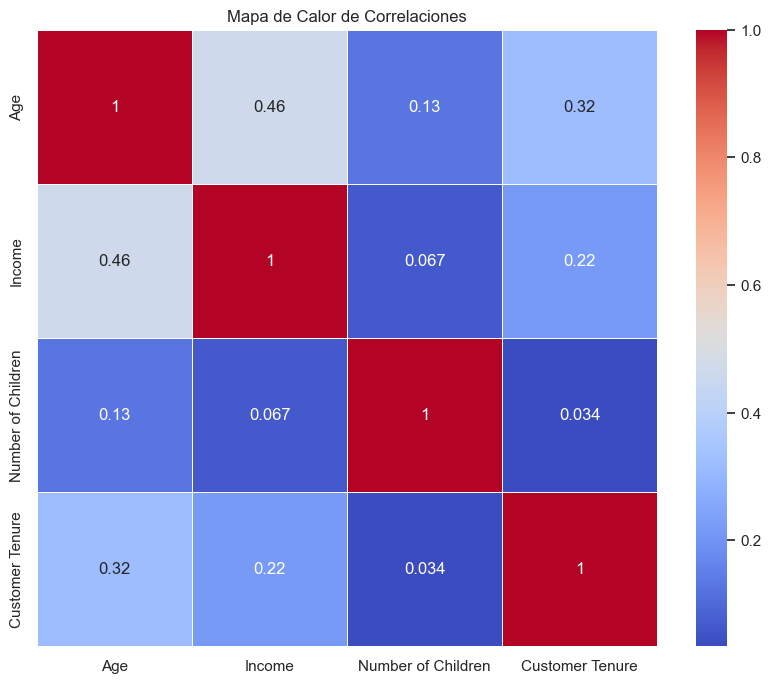

In [7]:
# Correlacion entre variables numericas
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones")
plt.show()


# 🔥 Interpretación del Mapa de Calor de Correlaciones

| Variables          | Correlación | Interpretación                                                                                                                                                             |
| :----------------- | :---------- | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Age vs Income      | 0.46        | 🟢 **Moderada correlación positiva**: La correlación es moderadamente positiva (entre 0.4 y 0.6), lo que sugiere que a mayor edad, el ingreso tiende a aumentar, aunque no es una regla absoluta. Es una relación interesante para segmentación. |
| Number of Children vs others | <0.30       | 🔵 **Correlación muy baja / nula**: No hay relación significativa entre la cantidad de hijos y las otras variables en este dataset.                                                         |
| Age vs Customer Tenunre | 0.32       | 🔵 **Correlación  positiva débil**: A medida que aumenta la edad, hay una ligera tendencia a que el tiempo como cliente sea mayor, lo cual es lógico, ya que las personas mayores han tenido más tiempo para establecer relaciones bancarias. La relación no es determinante dado que la correlación no es fuerte, significa que hay muchos clientes jóvenes con una larga antigüedad en el banco, y también clientes mayores con poca trayectoria bancaria.
                                                                 |

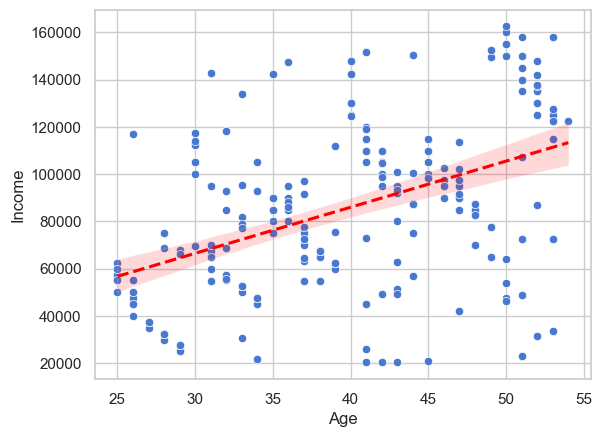

In [8]:
sns.scatterplot(data=df, x='Age', y='Income')
# Agregar la línea de tendencia (regresión lineal)
sns.regplot(data=df, x='Age', y='Income', scatter=False, color='red', line_kws={'linestyle':'--'})

# Mostrar el gráfico
plt.show()

El gráfico de dispersión muestra claramente una tendencia positiva entre la edad y el ingreso: a medida que la edad aumenta, también tiende a aumentar el ingreso. La línea roja de regresión lo confirma.

* 🔺 **Tendencia lineal positiva**: lo que valida lo que vimos en el heatmap (correlación ≈ 0.46)
* 🔹 **Variabilidad**: En rangos de 30 a 50 años, los ingresos presentan una mayor dispersión, con casos desde 50,000 hasta más de 150,000. Aunque la tendencia general parece ascendente, hay individuos con ingresos significativamente diferentes dentro del mismo rango de edad.
* 🔸 **Outliers potenciales**: Se observan algunos puntos por encima de 160,000, lo que indica clientes con ingresos excepcionalmente altos. También hay algunos valores por debajo de 30,000 en edades avanzadas, lo que sugiere que algunos clientes mayores tienen ingresos menores.


In [9]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos solo las columnas que usaremos para clusterizar
X = df[['Age', 'Income']]

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


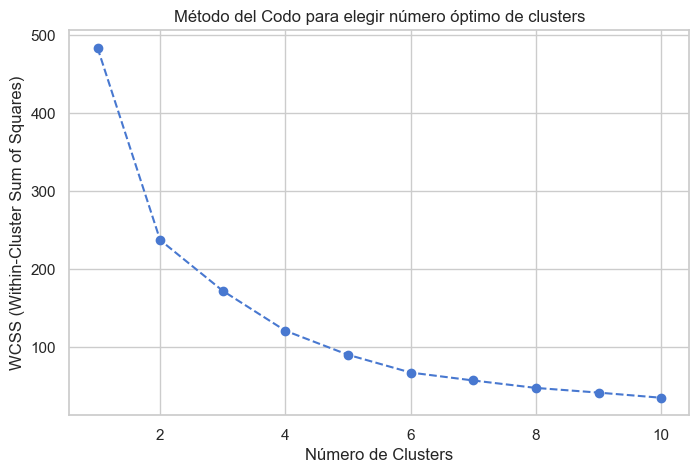

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista para guardar WCSS para cada número de clusters
wcss = []

# Probar de 1 a 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el resultado
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo para elegir número óptimo de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()


El punto donde el gráfico se empieza a “aplanar” es 4.

In [11]:
# Aplicamos KMeans con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Segment'] = kmeans.fit_predict(X_scaled)


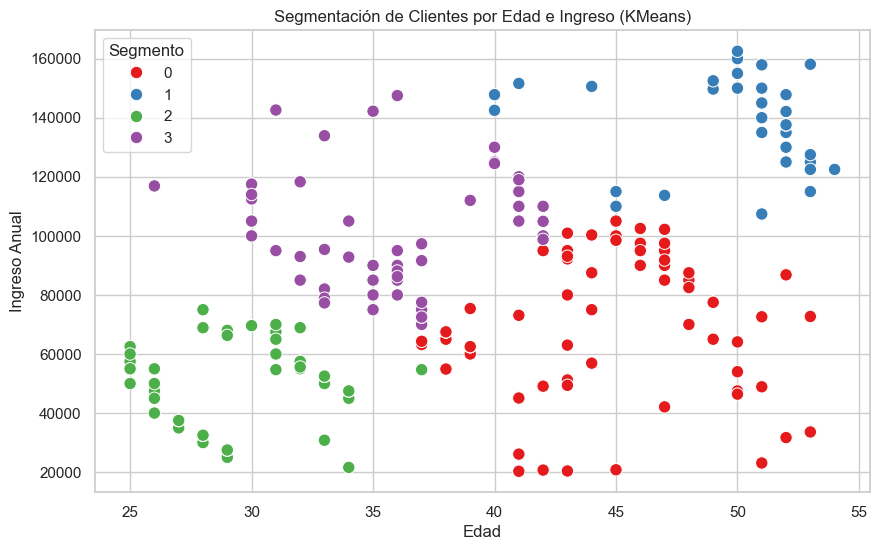

In [12]:
import seaborn as sns

# Visualizamos los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Income', hue='Segment', palette='Set1', s=80)
plt.title('Segmentación de Clientes por Edad e Ingreso (KMeans)')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual')
plt.legend(title='Segmento')
plt.grid(True)
plt.show()


### Descripción de Segmentos de Clientes

Hemos identificado tres segmentos clave de clientes basados en su edad e ingresos:

# Interpretación del Gráfico de Segmentación de Clientes por Edad e Ingreso (KMeans)

El gráfico de dispersión muestra la segmentación de clientes en 4 clústeres distintos (0, 1, 2, 3), generados mediante el algoritmo K-Means, utilizando las variables "Edad" e "Ingreso Anual". Cada color representa un segmento diferente, lo que nos permite identificar patrones y características distintivas para cada grupo de clientes.

## Análisis de los Clústeres:

### Segmento 0 (Rojo): Clientes de Ingresos Bajos a Medios, Edad Media a Avanzada
* **Rango de Edad:** Predominantemente entre los 40 y los 55 años.
* **Rango de Ingreso Anual:** Mayormente entre \$20,000 y \$100,000, con una concentración significativa en el rango de \$40,000 a \$80,000.
* **Características:** Este segmento parece agrupar a clientes con una edad más madura, pero con ingresos anuales relativamente moderados. Es posible que sean individuos en etapas de carrera más establecidas, pero no necesariamente con los ingresos más altos de la muestra, o que ya estén en una fase de desaceleración laboral.

### Segmento 1 (Azul): Clientes de Ingresos Altos, Edad Avanzada
* **Rango de Edad:** Claramente concentrado entre los 48 y los 55 años.
* **Rango de Ingreso Anual:** Exhibe los ingresos más altos de todos los segmentos, oscilando principalmente entre \$120,000 y \$160,000.
* **Características:** Este segmento representa a los clientes de mayor edad y con los ingresos anuales más elevados. Es muy probable que sean profesionales con mucha experiencia, ejecutivos o individuos en la cúspide de sus carreras profesionales, o incluso personas cercanas a la jubilación con altos niveles de ahorro o pensiones significativas.

### Segmento 2 (Verde): Clientes de Ingresos Bajos, Edad Joven a Media
* **Rango de Edad:** Mayormente entre los 25 y los 35 años.
* **Rango de Ingreso Anual:** Principalmente entre \$30,000 y \$70,000.
* **Características:** Este segmento está compuesto por clientes más jóvenes que los del segmento 0 y 1, con ingresos anuales en un rango medio. Es posible que sean jóvenes profesionales que están iniciando sus carreras, o individuos en etapas tempranas de desarrollo profesional, aún no alcanzando los picos de ingresos.

### Segmento 3 (Púrpura): Clientes de Ingresos Medios a Altos, Edad Media (con dispersión)
* **Rango de Edad:** Amplio, desde los 28 hasta los 48 años aproximadamente, con una concentración notable entre los 30 y los 40 años.
* **Rango de Ingreso Anual:** Presenta una dispersión considerable, abarcando desde aproximadamente \$60,000 hasta \$140,000. Hay una concentración visible entre \$80,000 y \$120,000.
* **Características:** Este segmento es el más heterogéneo en términos de ingreso, pero parece agrupar a clientes en la edad media, con ingresos que van desde medios hasta altos. Podrían ser profesionales en pleno ascenso de sus carreras, o individuos que han consolidado una trayectoria laboral. La dispersión en los ingresos sugiere que este grupo abarca diversas trayectorias profesionales dentro de un rango de edad similar.

## Conclusiones Generales y Posibles Implicaciones:

* **Segmentación Clara por Edad e Ingreso:** K-Means ha logrado identificar segmentos con características distintivas en cuanto a edad e ingreso, lo que es crucial para estrategias de marketing y desarrollo de productos.
* **Patrones de Ciclo de Vida:** Se observa una correlación entre edad e ingreso, sugiriendo patrones de ciclo de vida. Los clientes más jóvenes tienden a tener ingresos más bajos (Segmento 2), mientras que los clientes de edad media a avanzada pueden tener ingresos moderados (Segmento 0), altos (Segmento 1) o una mezcla (Segmento 3).
* **Oportunidades Estratégicas:**
    * Para el **Segmento 1 (Azul)**: Son los clientes de mayor valor potencial debido a sus altos ingresos. Podrían ser el foco de productos o servicios premium, inversiones, o estrategias de fidelización VIP.
    * Para el **Segmento 2 (Verde)**: Representan una base de clientes más jóvenes. Podrían ser adecuados para productos de iniciación, ahorro a largo plazo o servicios enfocados en el crecimiento profesional.
    * Para el **Segmento 0 (Rojo)**: A pesar de ser más maduros, sus ingresos son moderados. Podrían requerir ofertas de valor, planes de jubilación, seguros o productos que se ajusten a un presupuesto más conservador.
    * Para el **Segmento 3 (Púrpura)**: Dada su heterogeneidad en ingresos, podrían beneficiarse de una oferta más personalizada o de un abanico de productos que escalen con sus ingresos en ascenso.

En resumen, el análisis K-Means ha proporcionado una segmentación significativa que permite a la empresa comprender mejor a sus clientes y diseñar estrategias más específicas y efectivas para cada grupo. Sería interesante complementar este análisis con otras variables demográficas o de comportamiento para obtener una visión aún más profunda de cada segmento.

In [13]:
# Estadisticas por segmento
df.groupby('Segment')[['Age', 'Income']].mean()


,Age,Income
Segment,,
0,44.670886,72201.265823
1,49.594595,138156.756757
2,29.409836,49493.442623
3,35.553846,100995.384615


In [18]:
df.to_csv("clientes_segmentados.csv", index=False)

In [14]:
# Ver valores únicos por columna categórica (para entender cómo agrupar)
for col in ['Education', 'Marital Status', 'Home Ownership', 'Gender']:
    print(f"{col}: {df[col].unique()}")

# Agrupar por segmento y calcular estadísticas numéricas
resumen_numerico = df.groupby('Segment')[['Age', 'Income']].mean().round(2)

# Agrupar por segmento y obtener el valor más frecuente (modo) en columnas categóricas
resumen_categorico = df.groupby('Segment')[['Education', 'Marital Status', 'Home Ownership', 'Credit Score']].agg(lambda x: x.mode().iloc[0])

# Combinar ambos
resumen_segmentos = pd.concat([resumen_numerico, resumen_categorico], axis=1)

# Mostrar el resumen
print(resumen_segmentos)


Education: ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
Marital Status: ['Single' 'Married']
Home Ownership: ['Rented' 'Owned']
Gender: ['Female' 'Male']
           Age     Income            Education Marital Status Home Ownership  \
Segment                                                                        
0        44.67   72201.27    Bachelor's Degree        Married          Owned   
1        49.59  138156.76  High School Diploma        Married          Owned   
2        29.41   49493.44   Associate's Degree         Single         Rented   
3        35.55  100995.38      Master's Degree        Married          Owned   

        Credit Score  
Segment               
0               High  
1               High  
2            Average  
3               High  


### GRAFICOS INTERESANTES PARA EXPLORAR LOS SEGMENTOS CREADOS CON KMEANS

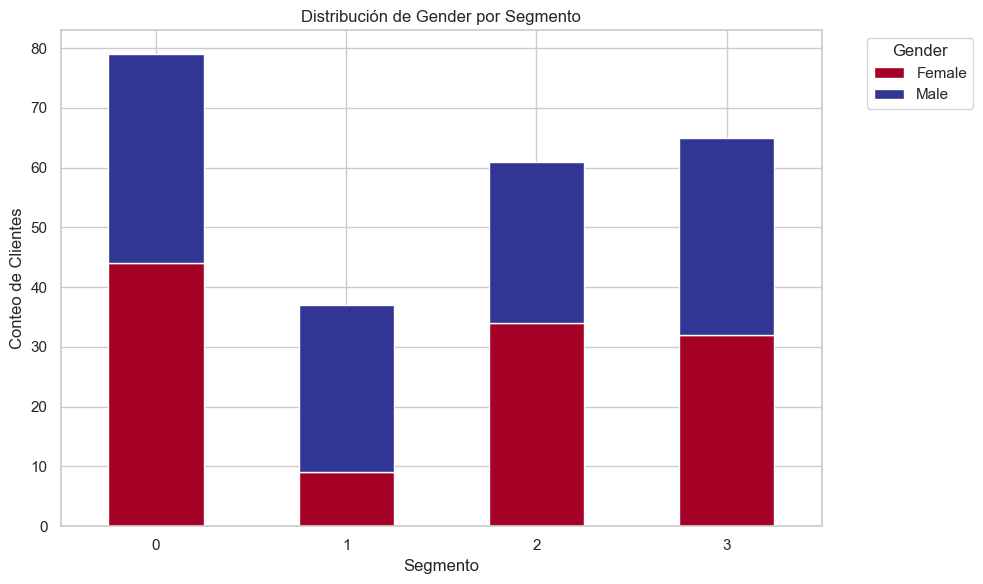

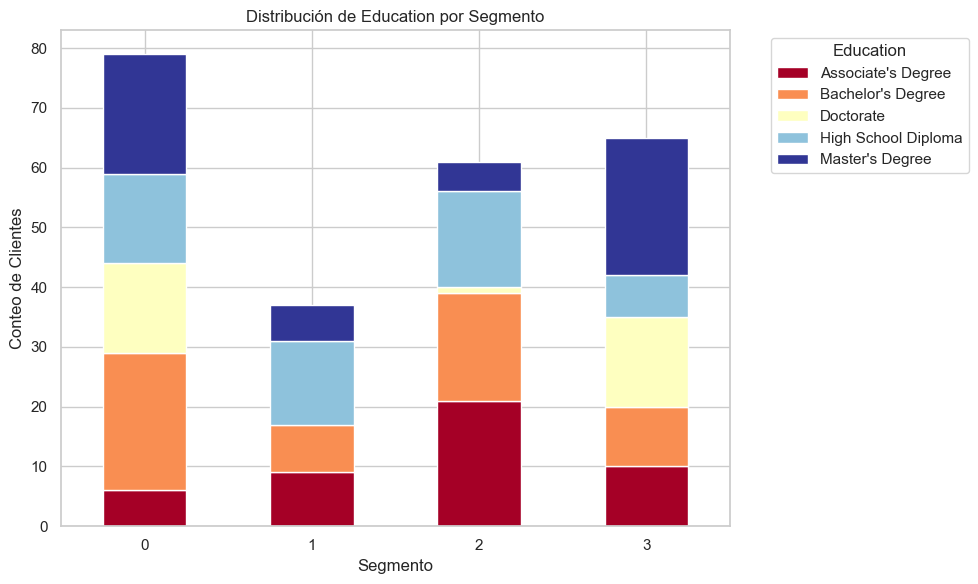

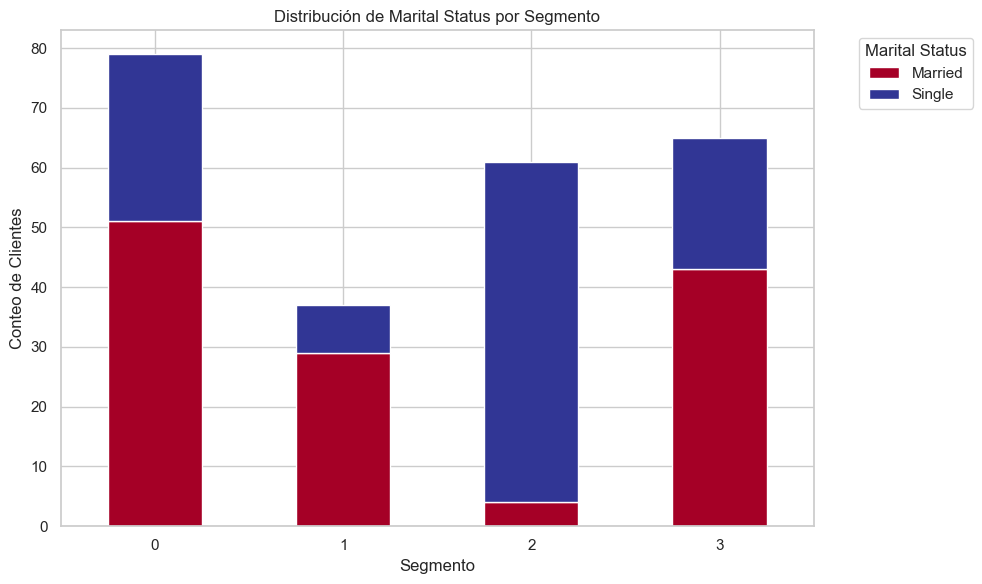

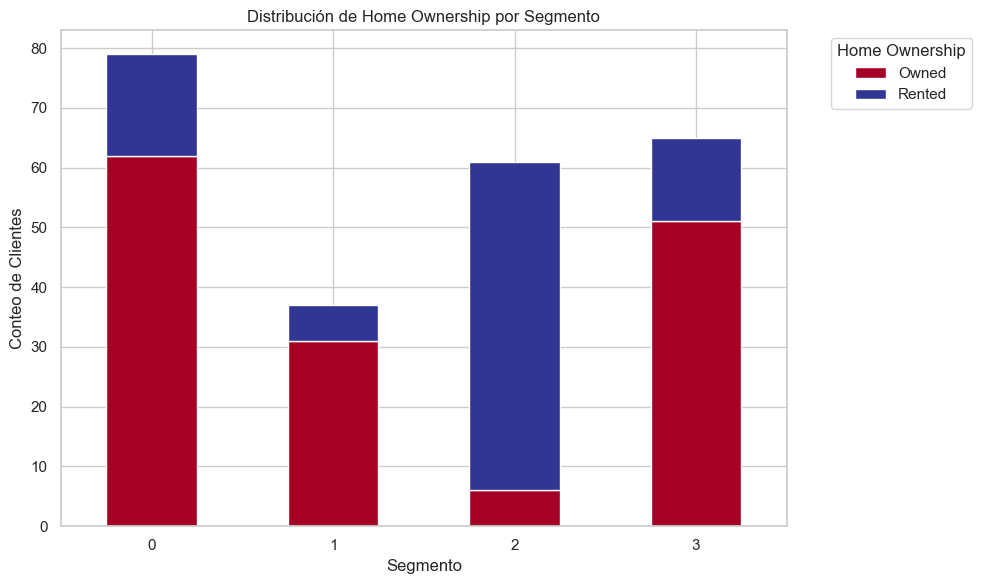

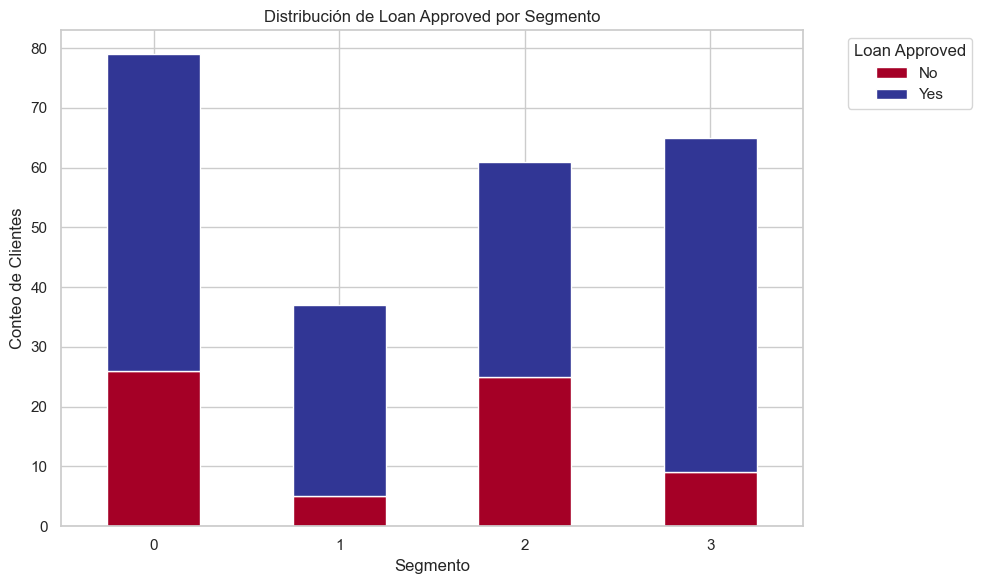

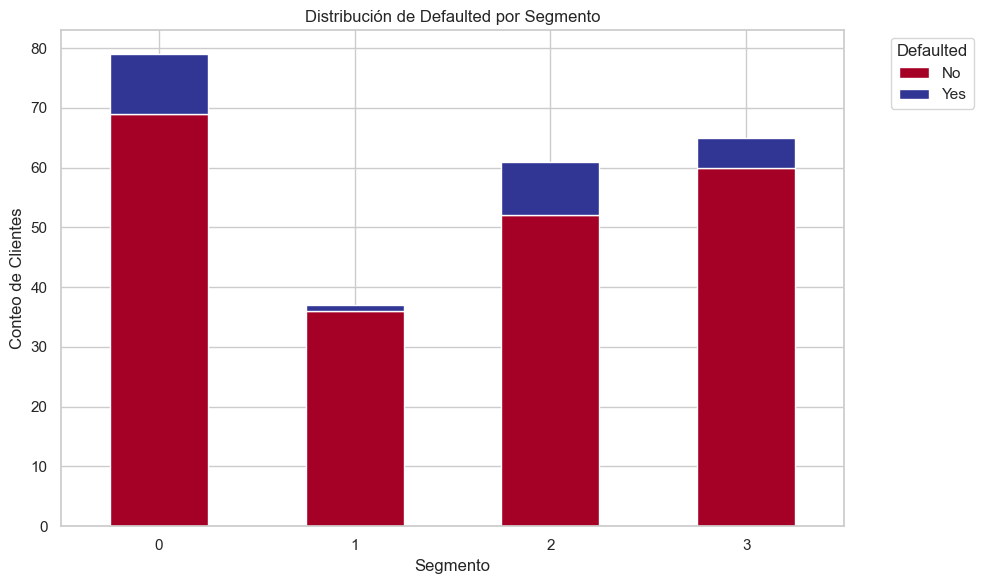

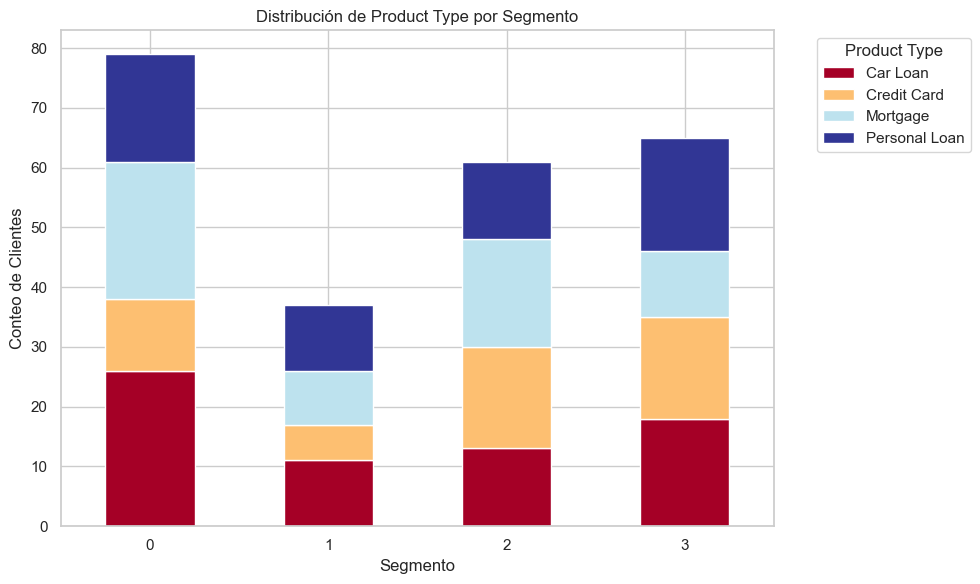

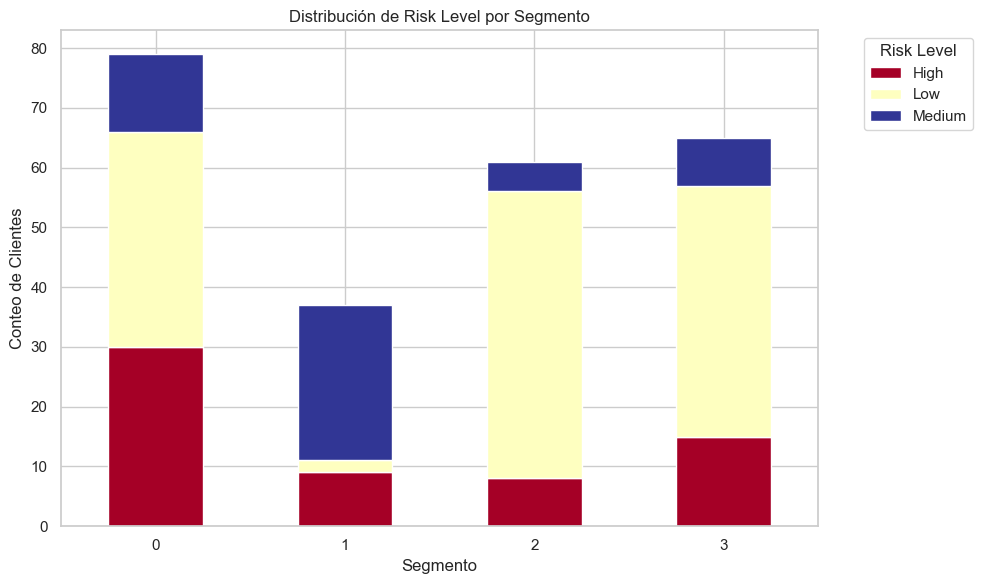

In [17]:
# --- 1. Gráficos de Barras Apiladas o Agrupadas (Categorical vs. Segment) ---
categorical_vars = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Loan Approved', 'Defaulted', 'Product Type', 'Risk Level']

for col in categorical_vars:
    plt.figure(figsize=(10, 6))
    # Using crosstab for counts and then plotting
    counts = pd.crosstab(df['Segment'], df[col])
    counts.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='RdYlBu')
    plt.title(f'Distribución de {col} por Segmento')
    plt.xlabel('Segmento')
    plt.ylabel('Conteo de Clientes')
    plt.xticks(rotation=0)
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

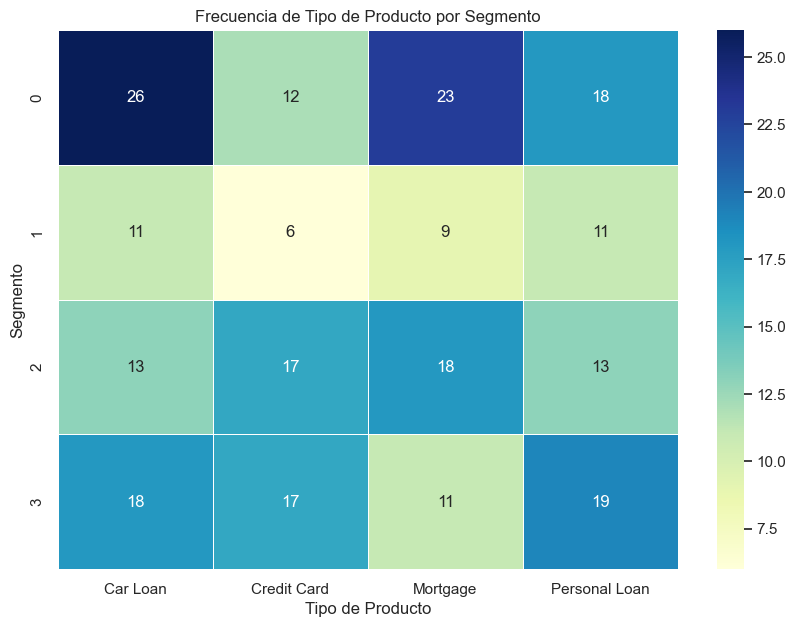

In [19]:
# --- 2. Mapas de Calor (Heatmaps) ---
# Example: Segment vs Product Type (could be any two categorical variables)
plt.figure(figsize=(10, 7))
heatmap_data = pd.crosstab(df['Segment'], df['Product Type'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Frecuencia de Tipo de Producto por Segmento')
plt.xlabel('Tipo de Producto')
plt.ylabel('Segmento')
plt.show()

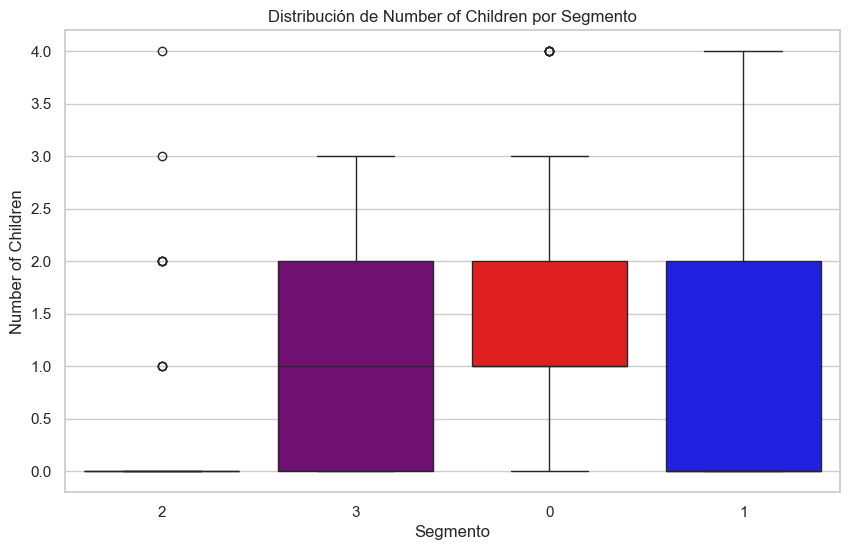

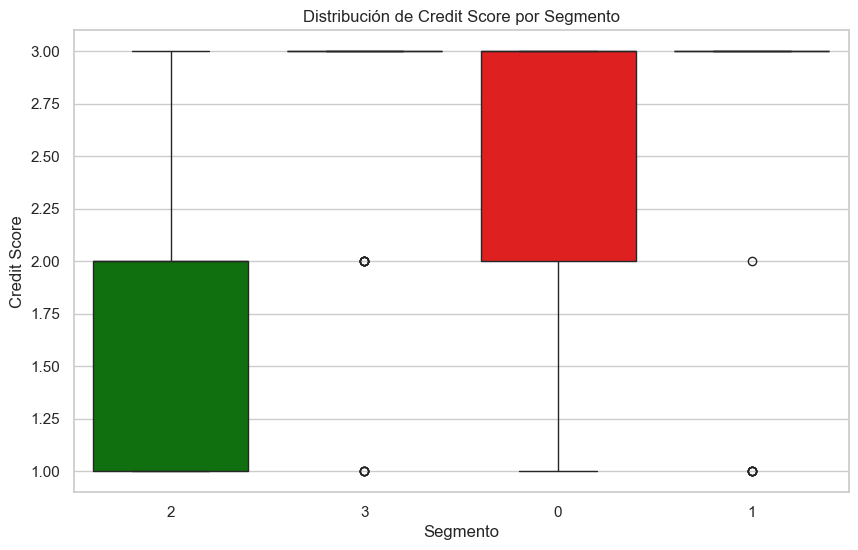

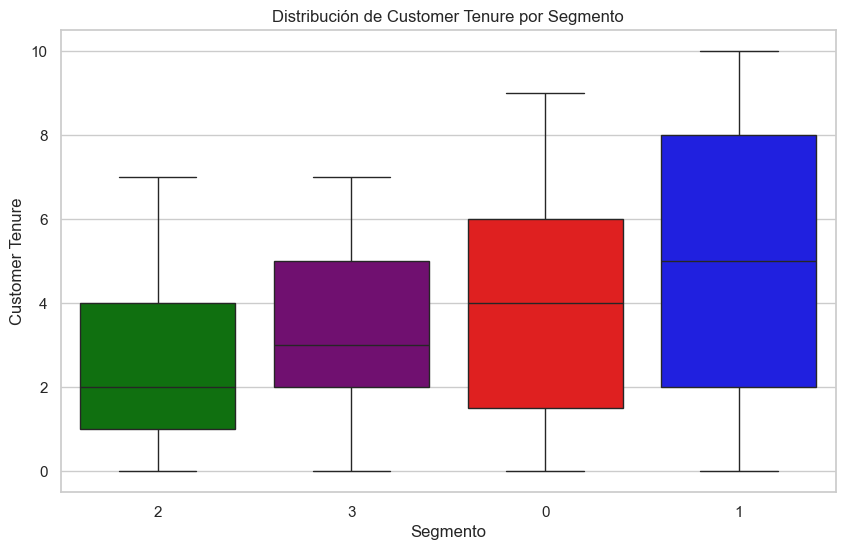

In [30]:
# --- 3. Box Plots (Numerical vs. Segment) ---
numerical_vars = ['Number of Children', 'Credit Score', 'Customer Tenure']

# Convert the 'Segment' column to string type to match the dictionary keys
df['Segment'] = df['Segment'].astype(str)

# Define segment colors with string keys
segment_colors = {'0': 'red', '1': 'blue', '2': 'green', '3': 'purple'}

# Credit score mapping
credit_score_mapping = {'Low': 1, 'Average': 2, 'High': 3}
df['Credit Score_Numeric'] = df['Credit Score'].map(credit_score_mapping)

# Numerical variables for box plots
numerical_vars = ['Number of Children', 'Credit Score', 'Customer Tenure']

# Generate box plots
for col in numerical_vars:
    plt.figure(figsize=(10, 6))
    if col == 'Credit Score':
        sns.boxplot(x='Segment', y='Credit Score_Numeric', data=df, hue='Segment', palette=segment_colors, legend=False)
        plt.ylabel('Credit Score (Numeric)')
    else:
        # Applied the fix here: added hue='Segment' and legend=False
        sns.boxplot(x='Segment', y=col, data=df, hue='Segment', palette=segment_colors, legend=False)
    plt.title(f'Distribución de {col} por Segmento')
    plt.xlabel('Segmento')
    plt.ylabel(col)
    plt.show()

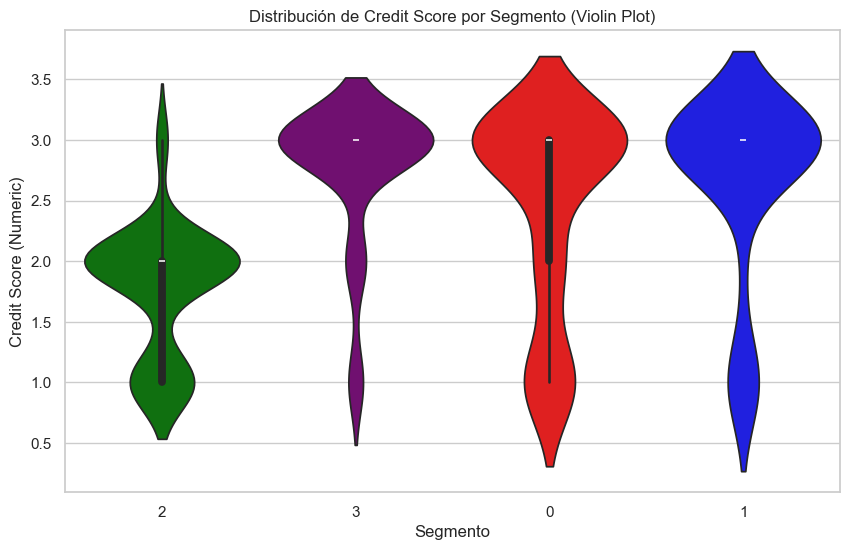

In [32]:
# --- 4. Violin Plots (Numerical vs. Segment - Example: Credit Score) ---
plt.figure(figsize=(10, 6))
sns.violinplot(x='Segment', y='Credit Score_Numeric', data=df, hue='Segment', palette=segment_colors)
plt.title('Distribución de Credit Score por Segmento (Violin Plot)')
plt.xlabel('Segmento')
plt.ylabel('Credit Score (Numeric)')
plt.show()

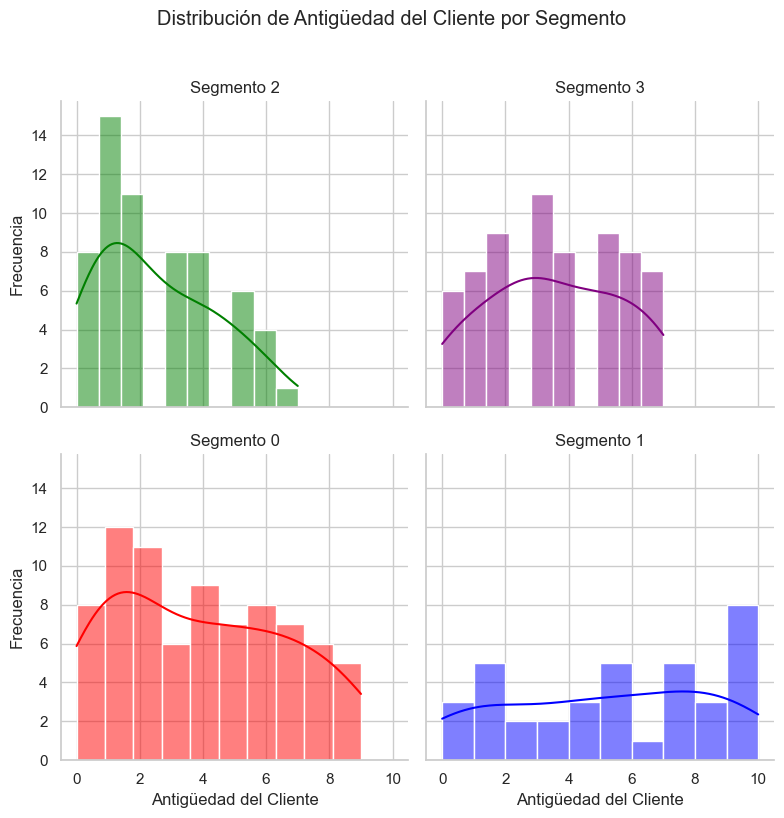

In [33]:
# --- 5. Histograms (Facet Grid - Example: Customer Tenure) ---
g = sns.FacetGrid(df, col='Segment', col_wrap=2, height=4, hue='Segment', palette=segment_colors)
g.map(sns.histplot, 'Customer Tenure', bins=10, kde=True)
g.set_axis_labels('Antigüedad del Cliente', 'Frecuencia')
g.set_titles('Segmento {col_name}')
plt.suptitle('Distribución de Antigüedad del Cliente por Segmento', y=1.02)
plt.tight_layout()
plt.show()